# NLP Hands-on: Twitter US Airline Sentiment Analysis

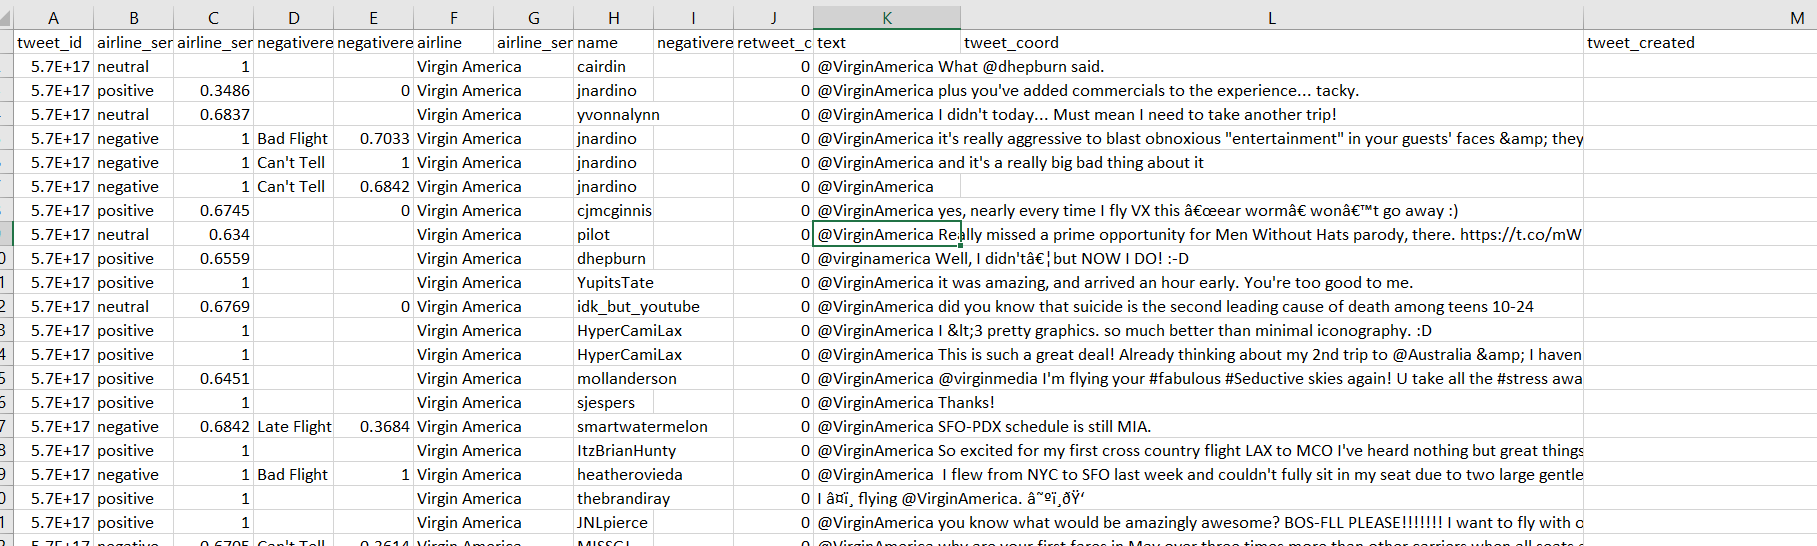

## Objective: To classify the `sentiment of tweets` into one of the three categories: `positive`, `negative` and `neutral`

### Data Description:

 - `Source`: `Twitter` -- coming from a project on Kaggle
 - `Description`: -- Passengers tweets about airline performance, having sentiments about their journey

# **Learning Outcomes**:
- Text based Exploratory Data Analysis
- Basic understanding of text pre-processing.
- What to do after text pre-processing:
    - Bag of words
    - Tf-idf
- Build the classification model.
- Tune & Evaluate the Model performance.
- Plot the  important features after training the model.

In [1]:
!pip install contractions

In [2]:
import re, string, unicodedata # import Regex, String and unicodedata
import contractions            # Import contractions library
from bs4 import BeautifulSoup  # Import BeautifulSoup


import numpy as np
import pandas as pd
import nltk                   ## Import Natural Language Tool-kit


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\think\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\think\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Load the data into `Pandas DataFrame`

In [5]:
import os
os.getcwd()

'C:\\Users\\think\\OneDrive - Thinking Mojo\\TSLC\\Intellipaat\\Session Master\\02. AI and DL IITR-20Jul2024'

In [6]:
data = pd.read_csv("Tweets.csv")

In [7]:
data.sample(2).T

,4827,12703
tweet_id,569694343776194560,570056002692710400
airline_sentiment,positive,positive
airline_sentiment_confidence,1.0,1.0
negativereason,NaN,NaN
negativereason_confidence,NaN,NaN
airline,Southwest,American
airline_sentiment_gold,NaN,NaN
name,DavidTresch,WanderLustErin
negativereason_gold,NaN,NaN
retweet_count,0,0


### Identifying the missing values

In [8]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
data.isnull().sum()/len(data)*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

### Let us do some amazing EDA - Exploratory Data Analysis

### `Percentage of tweets` by airline companies

In [11]:
import seaborn as sns

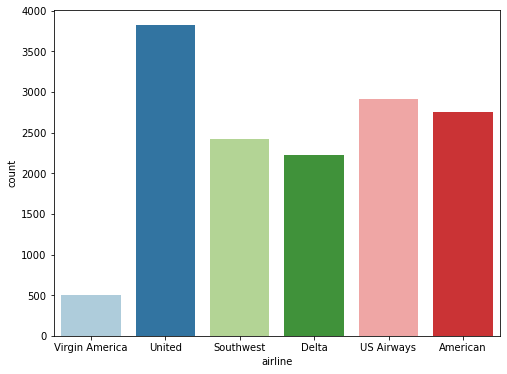

In [12]:
plt.subplots(figsize=(8,6))

sns.countplot(data=data, x='airline', palette = 'Paired')

plt.show()

In [14]:
print("Total number of tweets:", data['text'].count())

Total number of tweets: 14640


#### - We can see the percentage of tweets for `United Airlines` has the highest number of tweets ~ 26%, followed by `US Airways` (20%)

### `Distribution of Sentiments` across all tweets

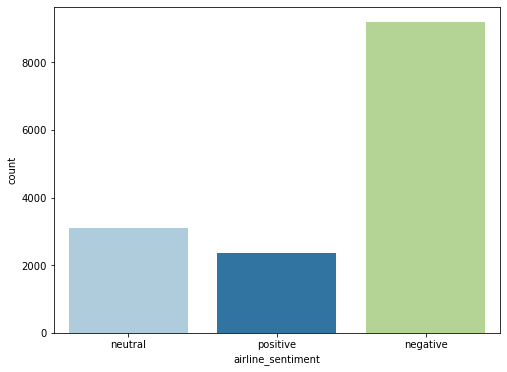

In [15]:
plt.subplots(figsize=(8,6))
sns.countplot(data=data,x='airline_sentiment', palette ='Paired')
plt.show()

#### Let us see some `negative` comments

In [19]:
sel_neg = data['airline_sentiment']=='negative'
data[sel_neg]['text'].sample(5).tolist()

["@JetBlue  I'm at 4:05  will be nasty in Boston. Have family driving 90 min to pick me up from Erie think flight - what if Cancelled Flighted?",
 '@AmericanAir my flight out of TYR tomorrow was Cancelled Flighted due to weather. How long until a rebook?',
 "@united @czamkoff It's all about profit, and they don't really give a damn about paying customers!!!! #greed",
 "@AmericanAir wasn't just a delay. Your counter wouldn't take a valid CAC card as a valid ID which is needed for a TSA precheck on pass",
 '@SouthwestAir I, along with other passengers repeatedly asked Southwest personnel what was taking so long, where was our luggage.']

In [21]:
sel_neg = data['airline_sentiment']=='negative'
data[sel_neg].sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12938,569975659730051072,negative,1.0000,Customer Service Issue,1.0000,American,NaN,RHFIT,NaN,0,@AmericanAir already shared with them. Nothing...,NaN,2015-02-23 13:42:41 -0800,NaN,NaN
659,570217606025748480,negative,1.0000,Customer Service Issue,0.6599,United,NaN,BouleChitte,NaN,0,@united not able to DM you my confirmation number,NaN,2015-02-24 05:44:06 -0800,NaN,NaN
2862,568858368829313024,negative,0.7087,Can't Tell,0.3707,United,NaN,StartupReport,NaN,3,@united kind of unnerving to watch the guy dei...,NaN,2015-02-20 11:42:58 -0800,Portland,Pacific Time (US & Canada)
12008,570270776370311168,negative,1.0000,Cancelled Flight,0.6353,American,NaN,BartonDVM,NaN,0,@AmericanAir You've misunderstood. @USAirways ...,NaN,2015-02-24 09:15:22 -0800,Arkansas,Central Time (US & Canada)
12425,570192546367975424,negative,1.0000,Customer Service Issue,1.0000,American,NaN,ianbeyer,NaN,0,@AmericanAir Your customer relations dept has ...,NaN,2015-02-24 04:04:31 -0800,"Wichita, Kansas",Central Time (US & Canada)


In [22]:
sel_pos = data['airline_sentiment']=='positive'
data[sel_pos]['text'].sample(5).tolist()

["@SouthwestAir I'm on the 10:55 flight! Everyone has been so nice and helpful! I'm just hoping we'll get to fly out! Thank you! ;)",
 "@united Thank you for the new Club at O'Hare. Very comfortable. You made the difficult weather days proficient and enjoyable.",
 '@SouthwestAir lol I already am ! I am a card member as well too lol i enjoy flying with you Guys',
 '@AmericanAir Thank you',
 '@SouthwestAir THANK YOU for finally making your boarding passes work with passbook']

In [23]:
sel_net = data['airline_sentiment']=='neutral'
data[sel_net]['text'].sample(5).tolist()

["@SouthwestAir wouldn't it be awesome for my first time flying to be #DestinationDragons?!",
 '@USAirways I recently moved and got a new license and when I booked my flight a months ago I used my old license do I need to change that?',
 '@united dm these nuts',
 '@AmericanAir I sent you a DM, can you please help.',
 '@USAirways Look into better service.']

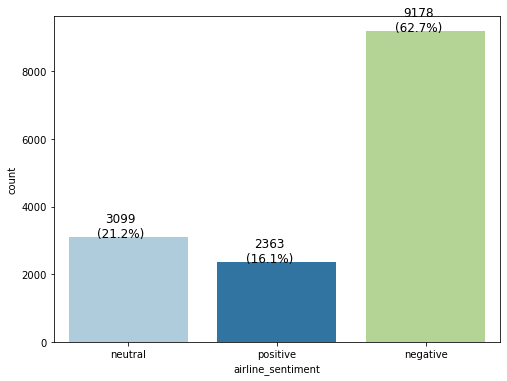

In [24]:
# Assuming 'data' is your DataFrame and 'airline_sentiment' is your column of interest
plt.subplots(figsize=(8, 6))

# Plot the countplot
ax = sns.countplot(
    data=data,
    x='airline_sentiment',
    palette='Paired'
)

# Calculate total count for percentage calculation
total = len(data)

# Annotate bars with count and percentage
for p in ax.patches:
    count = int(p.get_height())  # Get the height of each bar (count)
    percentage = f'{100 * count / total:.1f}%'  # Calculate the percentage
    x = p.get_x() + p.get_width() / 2 - 0.05  # Adjust x position for better alignment
    y = p.get_height() + 0.5  # Adjust y position to place above the bar
    ax.annotate(f'{count}\n({percentage})', (x, y), size=12, ha='center')  # Annotate the plot

plt.show()


##### 
- Majority of tweets are `negative` as expected (63%), followed by neutral tweets (21%), and then the positive tweets (16%)
- It's common for people to get`Twitter` and rant about the bad `customer service`

### `Distribution of Sentiments of Tweets` for each airline

In [25]:
airline_sentiment_grp = data.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()

In [26]:
airline_sentiment_grp

airline_sentiment,negative,neutral,positive
airline,,,
American,1960,463,336
Delta,955,723,544
Southwest,1186,664,570
US Airways,2263,381,269
United,2633,697,492
Virgin America,181,171,152


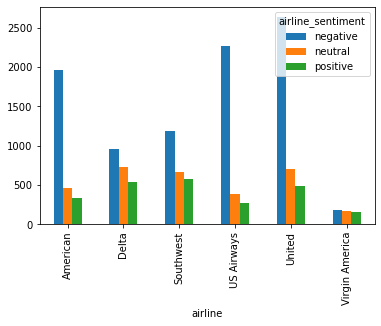

In [28]:
airline_sentiment_grp.plot(kind='bar')
plt.show()

### Task: Plot the stack bar chart showing `% split of sentiment for each airline`

- It is evident from the output that for almost all the airlines, the majority of the tweets are `negative`, followed by `neutral` and `positive` tweets

- `Virgin America` is probably the only airline where the ratio of the three sentiment groups is `somewhat similar`

## Let us deep dive on the `negative reasons`

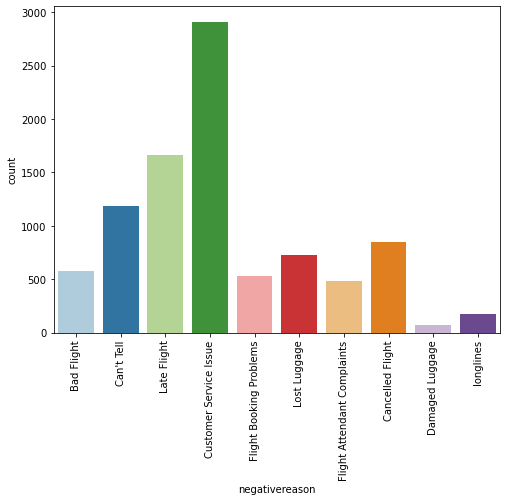

In [31]:
plt.subplots(figsize=(8,6))

sns.countplot(data=data, x='negativereason', palette ='Paired')

# Rotate the x-tick labels 
plt.xticks(rotation=90)

plt.show()


- **`Customer Service` is the top reason for negative sentiments**

### Let us start with `word cloud` for `negative tweets`

In [32]:
from wordcloud import WordCloud, STOPWORDS

In [33]:
neg_df = data[data['airline_sentiment']=='negative'] # filtered for negative sentiments
words = ' '.join(neg_df['text']) #combines all the tweets (stored in the column'text') into a single string, where each tweet is separated by space

In [35]:
words

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse @VirginAmerica and it\'s a really big bad thing about it @VirginAmerica seriously would pay $30 a flight for seats that didn\'t have this playing.\nit\'s really the only bad thing about flying VA @VirginAmerica SFO-PDX schedule is still MIA. @VirginAmerica  I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! @VirginAmerica why are your first fares in May over three times more than other carriers when all seats are available to select??? @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet @VirginAmerica status match program.  I applied and it\'s been three weeks.  Called and emailed with no response. @VirginAmerica What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be abl

### Cleaning the combined string - leveraging `list comprehension`

In [36]:
cleaned_text = " ".join([word for word in words.split() #splitting the words string into indiviual words based on whitespace
                         if 'http' not in word #exclude any word that contains "http"
                         and not word.startswith('@') #exclude words which start with "@" symbol
                         and word != "RT" # excludes "RT"
                        ])
    

In [37]:
cleaned_text

'it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse and it\'s a really big bad thing about it seriously would pay $30 a flight for seats that didn\'t have this playing. it\'s really the only bad thing about flying VA SFO-PDX schedule is still MIA. I flew from NYC to SFO last week and couldn\'t fully sit in my seat due to two large gentleman on either side of me. HELP! why are your first fares in May over three times more than other carriers when all seats are available to select??? you guys messed up my seating.. I reserved seating with my friends and you guys gave my seat away ... 😡 I want free internet status match program. I applied and it\'s been three weeks. Called and emailed with no response. What happened 2 ur vegan food options?! At least say on ur site so i know I won\'t be able 2 eat anything for next 6 hrs #fail amazing to me that we can\'t get any cold air from the vents. #VX358 #noair #worstflightever #roasted

In [48]:
wordcloud = WordCloud(stopwords=STOPWORDS, #exclude common stopwords
                     background_color=  'white',
                     width=3000,
                     height= 2500).generate(cleaned_text)

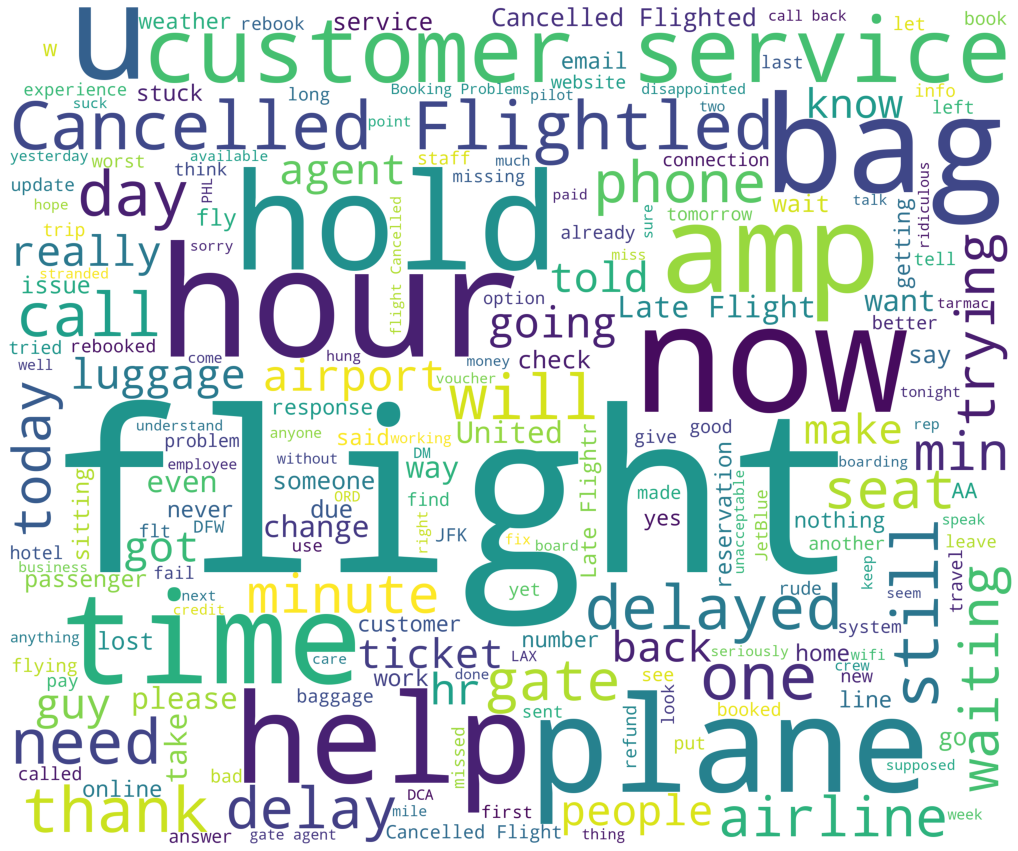

In [49]:
plt.subplots(figsize=(18,18))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()